In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/jogja___.csv')

In [3]:
mapping = {'Y': 1, 'N': 0}

fitur_1 = [
    'sistem_alarm','gym','internet_broadband_wifi','tv_kabel','pemanas_ruangan','pendingin_ruangan',
    'air_panas','telepon','televisi','kitchen_set','garasi','secure_parking','kolam_renang','lapangan_tenis',
    'balkon','dek','halaman_terbuka','area_hiburan_outdoor','pagar_penuh','taman','keamanan_24_jam','taman_bermain_anak'
]

df[fitur_1] = df[fitur_1].replace(mapping)

In [4]:
mapping = {'Y': 1, 'N': 0}
fitur_2 = [
    'malioboro','masjid_jogokariyan','malioboro_mall','universitas_ahmad_dahlan','terminal_giwangan',
    'universitas_gadjah_mada','universitas_sarjanawiyata_tamansiswa','universitas_pembangunan_nasional_veteran_yogyakarta',
    'lippo_plaza_jogja','masjid_gedhe_kauman','universitas_islam_indonesia','sleman_city_hall','institut_seni_indonesia_yogyakarta',
    'sekolah_tinggi_teknologi_adisutjipto','universitas_jenderal_achmad_yani','universitas_tidar','jogja_city_mall','ambarrukmo_plaza',
    'universitas_muhammadiyah_yogyakarta','monumen_jogja_kembali','stasiun_yogyakarta','universitas_teknologi_yogyakarta',
    'universitas_negeri_yogyakarta','sman_1_teladan_yogyakarta','rs_panti_nugroho','galeria_mall','rumah_sakit_jogja_international_hospital',
    'universitas_kristen_duta_wacana','stasiun_tugu','institut_sains_dan_teknologi_akprind','tugu_yogyakarta','universitas_aisyiyah','universitas_atmajaya_yogyakarta','rs_sardjito_yogyakarta',
    'sman_6_yogyakarta','stmik_amikom_yogyakarta','universitas_islam_negeri_sunan_kalijaga','gereja_saint_francis_xaverius_yogyakarta',
    'sahid_j_walk','rumah_sakit_panti_rapih','universitas_sanata_dharma_yogyakarta','sman_3_yogyakarta'
]

df[fitur_2] = df[fitur_2].replace(mapping)

In [5]:
X = df[['kamar_tidur', 'kamar_mandi', 'lahan', 'bangunan', 'latitude', 'longitude']+ fitur_1 + fitur_2]
y = df['harga']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
model_ln = LinearRegression()

model_ln.fit(X_train, y_train)

y_pred = model_ln.predict(X_test)

mse_ln = mean_squared_error(y_test, y_pred)
r2_ln = r2_score(y_test, y_pred)
mae_ln = mean_absolute_error(y_test, y_pred)
rmse_ln = np.sqrt(mse_ln)
mape_ln = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Absolute Percentage Error: {mape_ln}')
print(f'Root Mean Squared Error: {rmse_ln}')
print(f'Mean Squared Error ln: {mse_ln}')
print(f'R-squared ln: {r2_ln}')
print(f'Mean Absolute Error ln: {mae_ln}')

Mean Absolute Percentage Error: 0.4288361557580387
Root Mean Squared Error: 1562907118.3936405
Mean Squared Error ln: 2.4426786607255127e+18
R-squared ln: 0.490146578393145
Mean Absolute Error ln: 724055790.8697226


In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [10]:
def format_price(value,pos):
  milyar = '{:.1f}B'.format(value * 1e-9) if value >= 1e9 else ''
  juta = '{:.1f}M'.format(value * 1e-6) if 1e6 <= value <= 1e9 else ''
  ribu = '{:.1f}K'.format(value * 1e-3) if 1e3 <= value < 1e6 else ''

  return '{}{}{}'.format(milyar,juta,ribu)

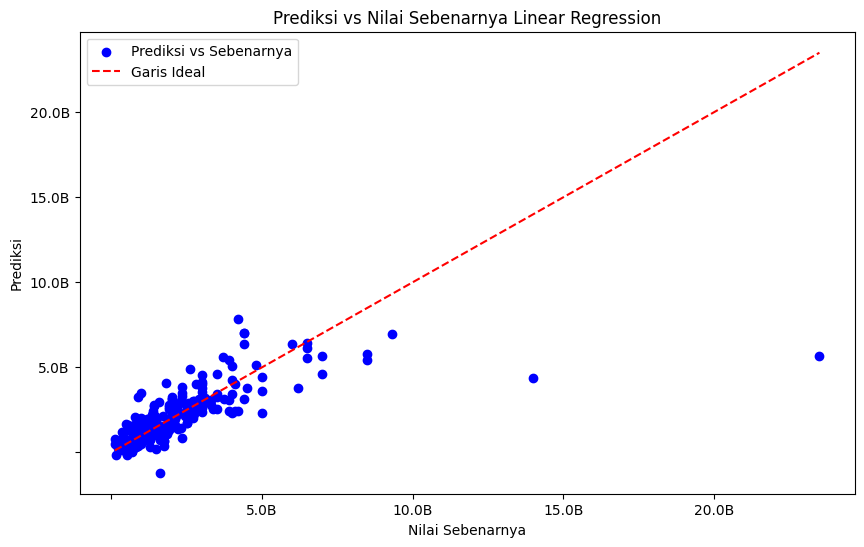

In [11]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', label='Prediksi vs Sebenarnya')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Garis Ideal')
plt.title('Prediksi vs Nilai Sebenarnya Linear Regression')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_price))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_price))
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.legend()
plt.show()

In [12]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()

model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Absolute Percentage Error: {mape_rf}')
print(f'Root Mean Squared Error: {rmse_rf}')
print(f'Mean Squared Error rf: {mse_rf}')
print(f'R-squared rf: {r2_rf}')
print(f'Mean Absolute Error rf: {mae_rf}')

Mean Absolute Percentage Error: 0.2760609737971662
Root Mean Squared Error: 1305963905.3031328
Mean Squared Error rf: 1.7055417219546102e+18
R-squared rf: 0.6440070908166333
Mean Absolute Error rf: 489956199.67115664


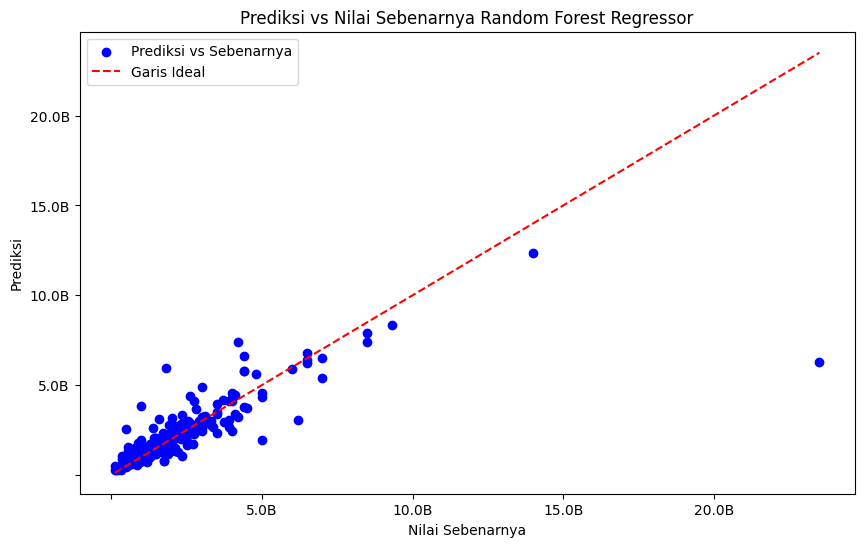

In [13]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', label='Prediksi vs Sebenarnya')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Garis Ideal')
plt.title('Prediksi vs Nilai Sebenarnya Random Forest Regressor')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_price))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_price))
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.legend()
plt.show()

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
model_gb = GradientBoostingRegressor()

model_gb.fit(X_train, y_train)

y_pred = model_gb.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred)
r2_gb = r2_score(y_test, y_pred)
mae_gb = mean_absolute_error(y_test, y_pred)
rmse_gb = np.sqrt(mse_gb)
mape_gb = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Absolute Percentage Error: {mape_gb}')
print(f'Root Mean Squared Error: {rmse_gb}')
print(f'Mean Squared Error: {mse_gb}')
print(f'R-squared: {r2_gb}')
print(f'Mean Absolute Error: {mae_gb}')

Mean Absolute Percentage Error: 0.33256225425220554
Root Mean Squared Error: 1442622423.9601924
Mean Squared Error: 2.081159458112781e+18
R-squared: 0.5656054610502428
Mean Absolute Error: 599577581.2188264


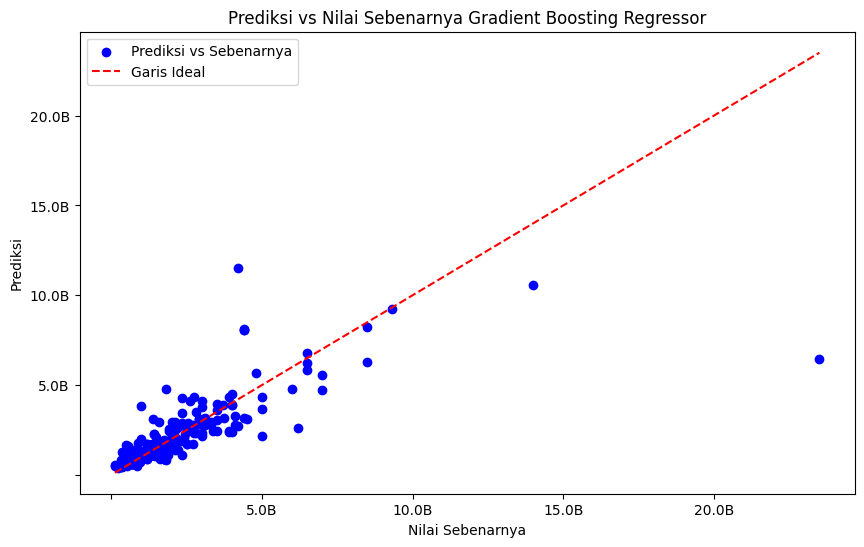

In [15]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', label='Prediksi vs Sebenarnya')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Garis Ideal')
plt.title('Prediksi vs Nilai Sebenarnya Gradient Boosting Regressor')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_price))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_price))
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.legend()
plt.show()